<a href="https://colab.research.google.com/github/visualhan/ComputerVision_Colab/blob/main/9%EA%B0%95_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%ED%95%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#실습7 이미지 분할

##01 컨투어(Contour)
* 컨투어(Countour): 이미지에서 같은 색상이나 밝기가 같은 연속된 점을 찾아 곡선으로 연결한 경계선
* 컨투어를 그리면 모양을 쉽게 인식하거나 분석할 수 있음<br>

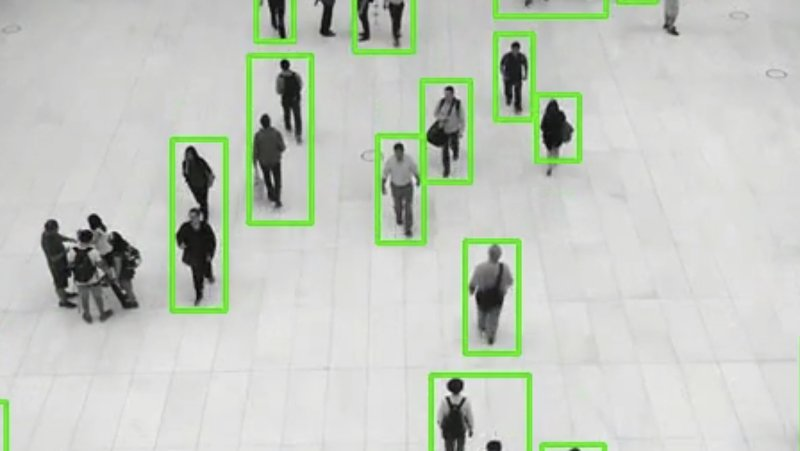

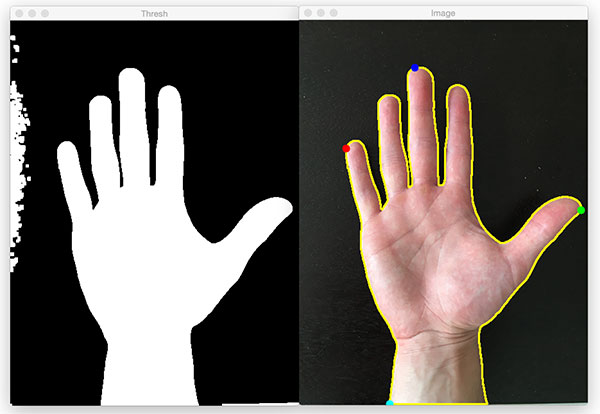


* 정확도를 위해 **바이너리 이미지**를 사용
  * 컨투어를 찾기 전에 **스레시홀딩**을 적용하거나 **캐니 에지** 검출을 사용
* OpenCV에서는 컨투어를 찾는 것은 까만 배경에서 하얀 객체를 찾는 것
  * **배경이 까맣고 전경이 하얀색이어야 함**
  * 반대일 경우, 스레시홀딩 중 반전효과가 있는 THRESH_BINARY_INV를 적용해서 사용



###01.1 컨투어 찾기

contours, hierarchy = cv2.findContours(src, mode, method, contours, hierarchy, offset)<br>
**parameters:**
* src: 입력 영상, 검정과 흰색으로 구성된 바이너리 이미지
* mode: 컨투어 제공방식
  * cv2.RETR_EXTERNAL: 가장 바깥쪽 라인만 생성
  * cv2.RETR_LIST: 모든 라인을 계층없이 생성 (=컨투어 라인 안쪽의 객체도 찾아서 컨투어 라인을 만들어 준다.)
  * cv2.RETR_CCOMP: 모든 라인을 2계층으로 생성
  * cv2.RETR_TREE: 모든 라인의 모든 계층정보를 트리 구조로 생성
* mothod: 근사값 방식
  * cv2.CHAIN_APPROX_NONE: 근사 없이 모든 좌표 제공
  * cv2.CHAIN_APPROX_SIMPLE: 컨투어 꼭짓점 좌표만 제공
  * cv2.CHAIN_APPROX_TC89_L1: Teh-Chin 알고리즘으로 좌표 개수 축소
  * cv2.CHAIN_APPROX_TC89_KCOS: Teh-Chin 알고리즘으로 좌표 개수 측소
* contours(optional): 검출한 컨투어 좌표(list type)
* hierachy(optional): 컨투어 계층 정보
  * Next, Prev, FirstChild, Parent
  * -1: 해당 없음
* offset(optional): ROI 등으로 인해 이동한 컨투어 좌표의 오프셋

###01.2 컨투어 그리기
cv2.drawContours(img, contours, contourIdx, color, thickness)<br>
**parameters:**
* img: 입력 영상
* contours: 그림 그릴 컨투어 배열(cv2.findContours() 함수의 반환 결과를 전달)
* contourIdx: 그림 그릴 컨투어 인덱스
  * -1: 모든 컨투어 표시
* color: 색상 값
* thickness: 선 두께
  * 0: 채우기

In [ ]:
# 구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


[도형의 갯수] contour:9


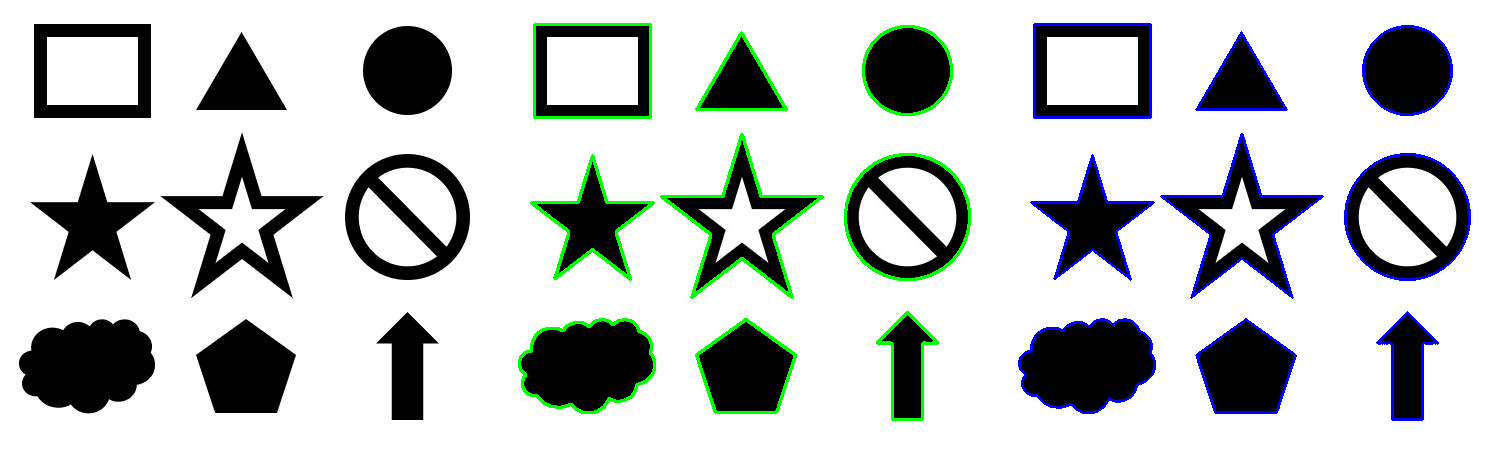

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')

img1 = srcimg.copy()
img2 = srcimg.copy()

grayimg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV) # 배경이 검은색, 객체가 하얀색이어야 하나, 샘플 이미지의 배경이 흰색, 객체가 검은색이므로 inverse로 바꿔준다.

# 가장 바깥쪽 컨투어에 대해 파이썬 리스트 형태로 모든 좌표 반환: cv2.CHAIN_APPROX_NONE
contour, hierachy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contour = 각각 컨투어에 대해 리스트로 선을 가지고 있고, 그 선에 해당하는 좌표도 가지고 있다.
# hierachy = 검은 원 안에 흰 원이 포함되어 있는 경우, 검은 원 바깥에 컨투어와 흰 원 바깥의 컨투어 2개를 계층 구조로 가지고 있다.
# hierachy = 컨투어가 포함이 되는지 안되는지를 이용하여 객체의 포함관계를 확인할 수 있다.
cv2.drawContours(img1, contour, -1, (0,255,0), 2)   # 원본 이미지에 컨투어를 그린다.

# 컨투어 모든 좌표를 파란색 원으로 그리기
for i in contour:
  for j in i:    # j=컨투어가 가지고 있는 점들(좌표)
    cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1)  # 각 좌표를 점으로 그려본다.

# 각각의 컨투어 갯수 출력
print('[도형의 갯수] contour:%d'%(len(contour)))

image_frame = np.hstack([srcimg, img1, img2])
cv2_imshow(image_frame)

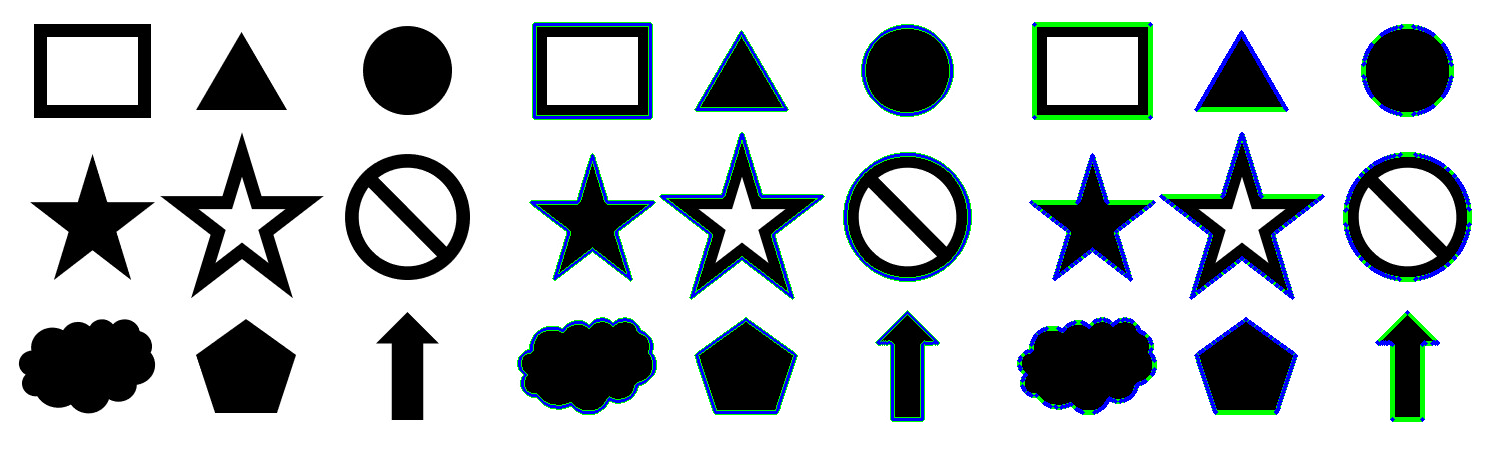

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')

img1 = srcimg.copy()
img2 = srcimg.copy()

grayimg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV) # 배경이 검은색, 객체가 하얀색이어야 하나, 샘플 이미지의 배경이 흰색, 객체가 검은색이므로 inverse로 바꿔준다.

# 가장 바깥쪽 컨투어에 대해 파이썬 리스트 형태로 모든 좌표 반환: cv2.CHAIN_APPROX_NONE
contour1, hierachy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img1, contour1, -1, (0,255,0), 4) # img1에 녹색으로 그린다.
for i in contour1:
  for j in i:
    cv2.circle(img1, tuple(j[0]), 1, (255,0,0), -1)  # 좌표 위치에 그린다. 녹색선이 보이는 지 확인


# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표 반환: cv2.CHAIN_APPROX_SIMPLE
contour1, hierachy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contour1, -1, (0,255,0), 4)
for i in contour1:
  for j in i:
    cv2.circle(img2, tuple(j[0]), 2, (255,0,0), -1)  # 좌표 위치에 그린다. 녹색선이 보이는 지 확인

image_frame = np.hstack([srcimg, img1, img2])
cv2_imshow(image_frame)
# img2는 꼭지점만 가지고 있으므로 녹색선이 보이고, 꼭지점에 파란색으로 표시된다.

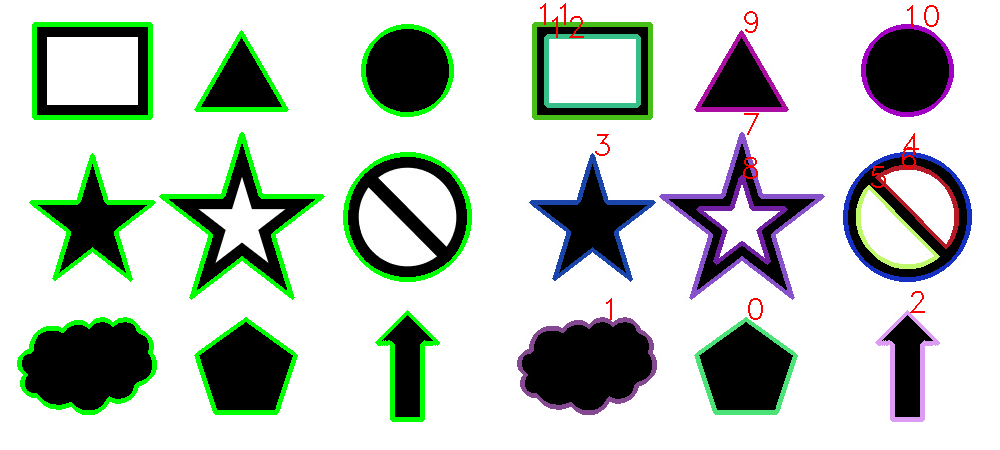

9 [Next, Prev, First Child, Parent]
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [-1  7 -1 -1]]]
13 [Next, Prev, First Child, Parent]
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 7  3  5 -1]
  [ 6 -1 -1  4]
  [-1  5 -1  4]
  [ 9  4  8 -1]
  [-1 -1 -1  7]
  [10  7 -1 -1]
  [11  9 -1 -1]
  [-1 10 12 -1]
  [-1 -1 -1 11]]]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')

img1 = srcimg.copy()
img2 = srcimg.copy()

grayimg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV) # 배경이 검은색, 객체가 하얀색이어야 하나, 샘플 이미지의 배경이 흰색, 객체가 검은색이므로 inverse로 바꿔준다.

# img1
# 가장 바깥쪽 컨투어만 수집: cv2.CHAIN_APPROX_NONE + NONE
contour1, hierachy1 = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img1, contour1, -1, (0,255,0), 4) # img1에 녹색으로 그린다.

# img2
# 모든 컨투어를 트리 계층으로 수집: cv2.RETR_TREE + SIMPLE
contour2, hierachy2 = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for idx, cont in enumerate(contour2):
  #랜덤 컬러 추출
  randomColor = [int(i) for i in np.random.randint(0, 255, 3)]
  # 컨투어 인덱스 마다 랜덤한 색상 지정
  cv2.drawContours(img2, contour2, idx, randomColor, 3)
  # 컨투어 첫 좌표에 인덱스 숫자 표시
  cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255))

image_frame = np.hstack([img1, img2])
cv2_imshow(image_frame)

print(len(contour1), "[Next, Prev, First Child, Parent]") # hierachy가 가지고 있는 정보의 의미
print(hierachy1) # hierachy의 인덱스는 출력되지 않음. 인덱스는 0부터 시작

print(len(contour2), "[Next, Prev, First Child, Parent]")
print(hierachy2)

#img2는 안쪽 컨투어까지 색이 표시된다.

###01.3 컨투어를 다양한 도형으로 감싸기
1. 좌표를 감싸는 사각형 반환<br>
x, y, w, h = cv2.boundingRect(contour)<br>
**parameters:**
* x, y: 사각형의 왼쪽 상단 좌표
* w, h: 자각형의 폭과 높이

2. 좌표를 감싸는 최소한의 사각형 계산<br>
rotateRect = cv2.minAreaRect(contour)<br>
**parameters:**
* center: 중심점(x, y)
* size: 크기(w, h)
* angle: 회전 각(양수: 시계 방향, 음수: 반시계 방향)

3. rotateRect로부터 꼭짓점 좌표 계산<br>
vertex = cv2.boxPoints(rotateRect)<br>
**parameters:**
* vertex: 4개의 꼭짓점 좌표, 소수점 포함이므로 정수 변환 필요

4. 좌표를 감싸는 최소한의 동그라미 계산
center, radius = cv2.minEnclosingCircle(contour)<br>
**parameters:**
* center: 원점 좌표(x, y), 튜플
* radius: 반지름

5. 좌표를 감싸는 최소한의 삼각형 계산
area, triangle = cv2.minEnclosingTriangle(points)<br>
**parameters:**
* area: 넓이
* triangle: 3개의 꼭짓점 좌표


6. 좌표를 감싸는 최소한의 타원 계산
ellipse = cv2.fitEllipse(points)<br>
**parameters:**
* ellipse
  * center: 원점 좌표(x, y), 튜플
  * axes: 축의 길이(x축, y축), 튜플

7. 중심점을 통과하는 직선 계산
line = cv2.fitLine(points, distType, param, reps, aeps, line)<br>
**parameters:**
* distType: 거리계산 방식
  * cv2.DIST_L2, cv2.DIST_L1, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER
* param: distType에 전달할 인자, 0=최적 값 선택
* reps:반지름 정확도, 선과 원본 좌표의 거리(0.01 권장)
* aeps:각도 정확도(0.01 권장)
* line(optional): vx, vy정규화된 단위 벡터, x0, y0: 중심점 좌표



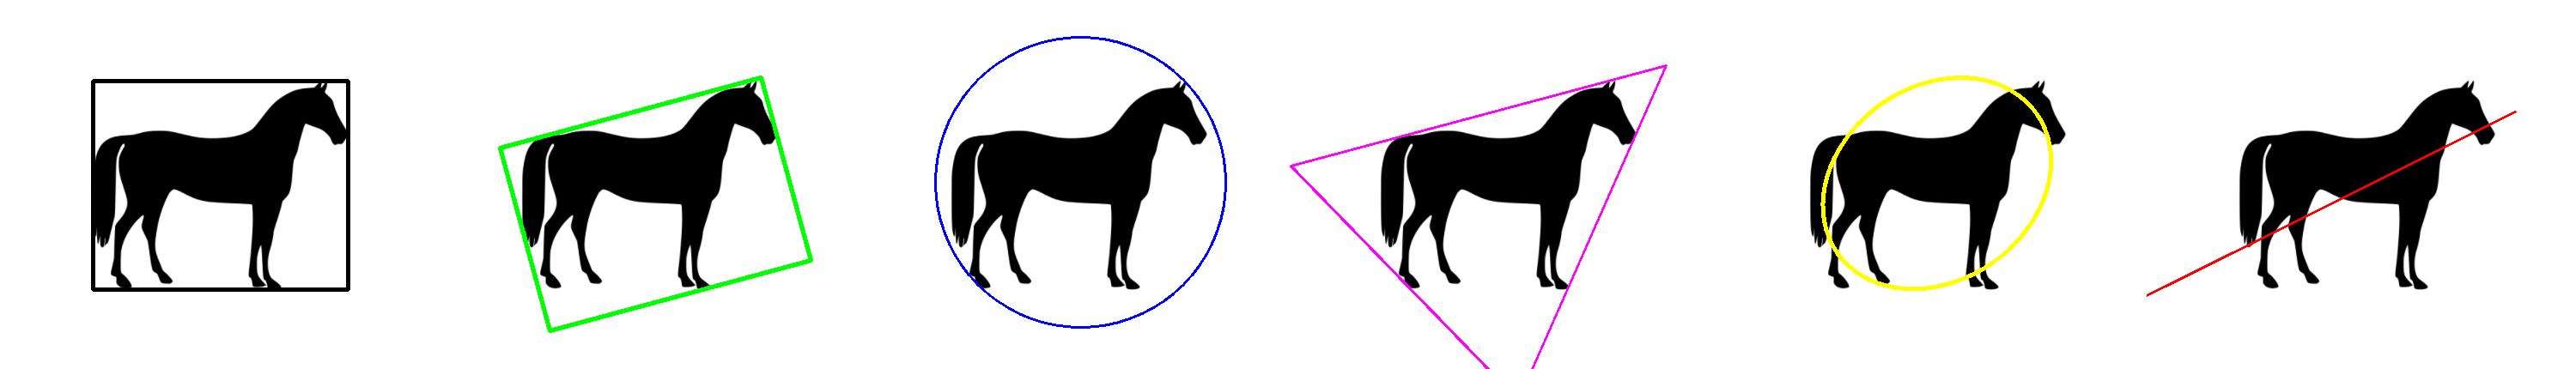

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/horse_shape.jpg')

img1 = srcimg.copy()
img2 = srcimg.copy()
img3 = srcimg.copy()
img4 = srcimg.copy()
img5 = srcimg.copy()
img6 = srcimg.copy()

imgray = cv2.cvtColor(srcimg, cv2.COLOR_BGR2GRAY)
ret, cntr_threshold = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

#컨투어 찾기
contours, hr = cv2.findContours(cntr_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contour)
cv2.rectangle(img1, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contour)
box = cv2.boxPoints(rect)     # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)            # 정수로 변환
cv2.drawContours(img2, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파란색)
(x, y), radius = cv2.minEnclosingCircle(contour)
cv2.circle(img3, (int(x), int(y)), int(radius), (255,0,0), 2)

#최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(contour)
cv2.polylines(img4, [np.int32(tri)], True, (255,0,255), 2)

#최소한의 타원 표시(노란색)
ellipse = cv2.fitEllipse(contour)
cv2.ellipse(img5, ellipse, (0,255,255), 3)

#중심점 통과하는 직선 표시(빨간색)
[vx,vy,x,y] = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01)
cols, rows = img6.shape[:2]
cv2.line(img6, (0, 0-x*(vy/vx)+y), (cols-1, (cols-x)*(vy/vx)+y), (0,0,255), 2)

image_frame = np.hstack([img1, img2, img3, img4, img5, img6])
cv2_imshow(image_frame)

##02 이미지 모멘트(Moment)
* 모멘트: 물리학에서 힘의 양을 기술할 때 표현하지만 컴퓨터 비전에서는 이미지의 양적인 속성 표현<p>
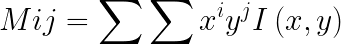
  * 컨투어가 둘러싸는 영역의 x,y 좌표의 픽셀 값과 좌표 인덱스의 i,j 차수를 곱한 것의 합
  * M(0,0)는 f(x,y)x^0y^0을 표기(=컨투어 면적 넓이, moment['m00'])
    * 바이너리 이미지이기 때문에 0이 아닌 모든 픽셀 값을 1로 계산
    * i,j 차수는 0~3
  * cv2.moments()함수는 다양한 모멘트 값을 딕셔너리 형식으로 반환<br>
  moment = cv2.monments(contour)
    * 차수를 바꿔가며 모멘트를 계산하면 다양한 값을 얻을 수 있음
    * 무게 중심이나 물체의 넓이, 둘레 길이 등을 구할 때 유용<br>
      * 모멘트를 사용해 중심점 구하기<br>
    M = cv2.moments(contour)<br>
    cx = int(M['m10'] / M['m00'])<br>
    cy = int(M['m01'] / M['m00'])<br>

###02.1 컨투어와 모멘트로 넓이와 둘레 계산
area = cv2.contourArea(contour) = moment['m00']<p>
perimeter = cv2.arcLength(contour, option)<p>
**parameters:**
* option
  * True: 폐곡선 도형을 만들어 둘레 길이를 구함
  * False: 시작점과 끝점을 연결하지 않고 둘레 길이 구함

area:9539.00
area:17111.00
area:30264.00
area:17326.00
area:13856.50


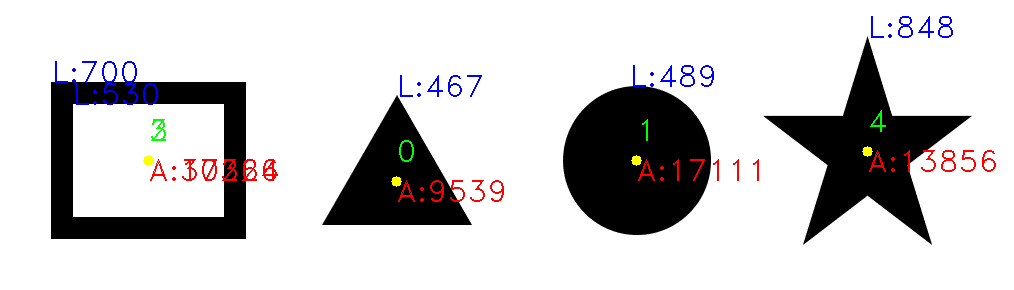

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

#컨투어 찾기
#contours, hr = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours, hr = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for idx, contour in enumerate(contours):
  moment = cv2.moments(contour)
  #중심점
  cx = int(moment['m10'] / moment['m00'])
  cy = int(moment['m01'] / moment['m00'])
  #영역 넓이
  area = moment['m00']
  length = cv2.arcLength(contour, True)
  cv2.circle(img, (cx, cy), 5, (0,255,255), -1)  # 중심점
  cv2.putText(img, 'A:%.0f'%area, (cx, cy+20), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255))
  cv2.putText(img, 'L:%.0f'%length, tuple(contour[0][0]), cv2.FONT_HERSHEY_DUPLEX, 1, (255,0,0))
  cv2.putText(img, str(idx), (cx, cy-20), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0))

  print("area:%.2f"%cv2.contourArea(contour))

cv2_imshow(img)


###02.2 컨투어 단순화
approx = cv2.approxPolyDP(contour, epsilon, closed)<p>
**parameters:**
* contour: 대상 컨투어 좌표
* epsilon: 근사값 정확도, 오차범위
  * epsilon = 0.05 * cv2.arcLength(cnt, True) = 둘레길이의 5%
* closed: 컨투어의 닫힘 여부(True/False)
* approx: 근사 계산한 컨투어 좌표

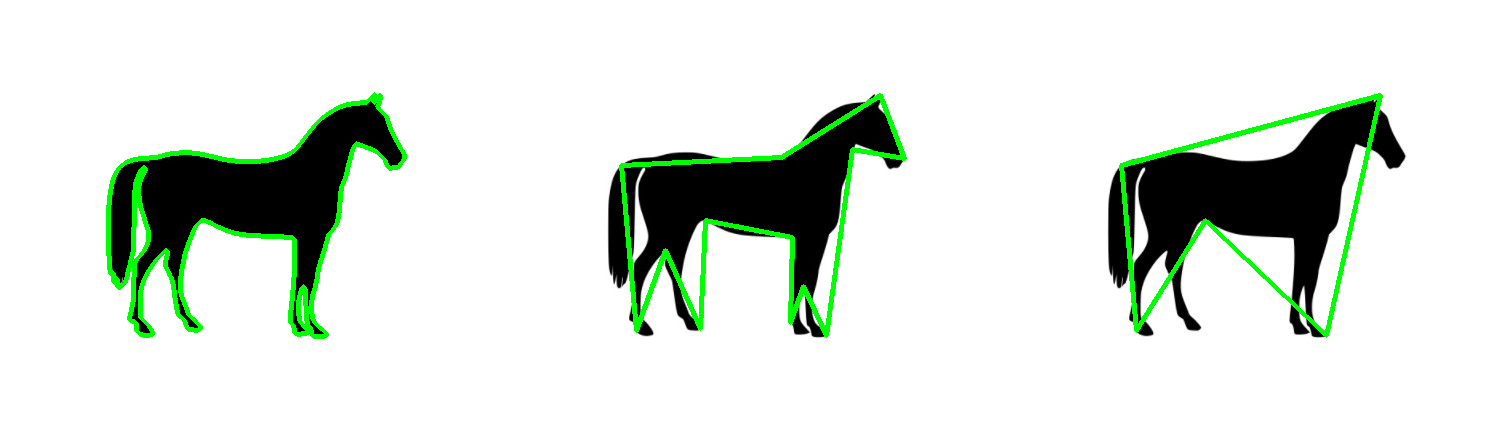

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/horse_shape.jpg')
img2 = img1.copy()
img3 = img1.copy()

imgray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

#컨투어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]

#전체 둘레의 0.05로 오차범위 지정
epsilon1 = 0.015 * cv2.arcLength(contour, True)
approx1 = cv2.approxPolyDP(contour, epsilon1, True)

#전체 둘레의 0.09로 오차범위 지정
epsilon2 = 0.05 * cv2.arcLength(contour, True)
approx2 = cv2.approxPolyDP(contour, epsilon2, True)

#각각 컨투어 선 그리기
cv2.drawContours(img1, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx1], -1, (0,255,0), 3)
cv2.drawContours(img3, [approx2], -1, (0,255,0), 3)


image_frame = np.hstack([img1, img2, img3])
cv2_imshow(image_frame)

###02.3 컨투어 단순화
* 볼록 선체(convex hull): 어느 한 부분도 오목하지 않는 도형
* 볼록 선체는 대상을 완전히 포함하는 외곽영역을 찾는데 유용

1. 볼록 선체 계산<p>
hull = cv2.convexHull(points, hyll, clockwise, returnPoints)<p>
**parameters:**
  * points: 입력 컨투어
  * hull(optional): 볼록 선체 결과
  * clockwise(optional): 방향 지정(True:시계 방향)
  * returnPoints(optional): 결과 좌표 형식 선택
    * True=볼록 선체 좌표 반환
    * False=입력 컨투어 중에 볼록 선체에 해당하는 인덱스 반환

2. 볼록 선체 만족 여부 확인<p>
retval = cv2.isContourConvex(contour)<p>
**parameters:**
  * retval: True인 경우 볼록 선체임


3. 볼록 선체 결함 찾기<p>
defects = cv2.convexityDefects(contour, convexhull)<p>
**parameters:**
  * contour: 입력 컨투어
  * convexhull: 볼록 선체에 해당하는 컨투어의 인덱스
  * defects: 볼록 선체 결함이 있는 컨투어의 배열 인덱스, N x1 x4 배열[start, end, farthest, distance]
    * start: 오목한 각이 시작되는 컨투어의 인덱스
    * end: 오목한 각이 끝나는 컨투어의 인덱스
    * farthest: 볼록 선체에서 가장 먼 오목한 지점의 컨투어 인덱스
    * distance: farthest와 볼록 선체와의 거리

False True


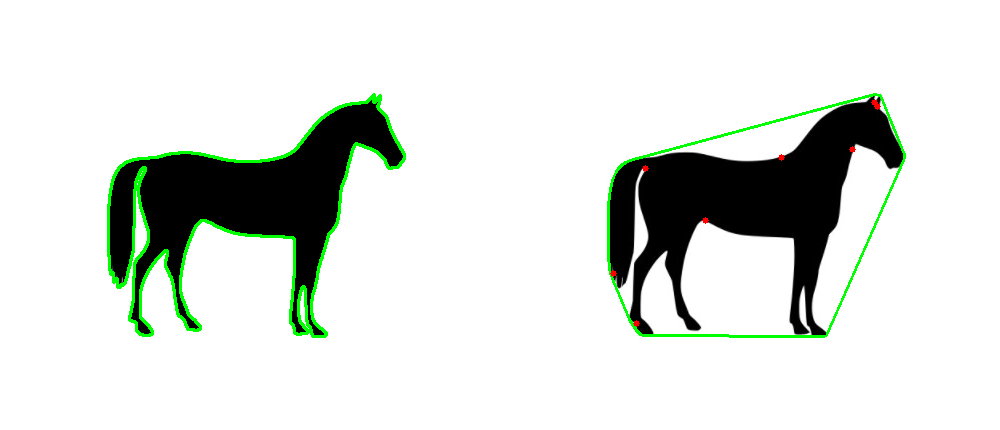

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/horse_shape.jpg')
img2 = img1.copy()

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cntr = contours[0]
cv2.drawContours(img1, [cntr], -1, (0,255,0), 2)

# 볼록 선체 찾기(좌표기준) & 그리기
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 2)
#볼록 선체 만족 여부 확인
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

#볼록 선체 찾기
hull2 = cv2.convexHull(cntr, returnPoints=False)
#볼록 선체 결함 찾기
defects = cv2.convexityDefects(cntr, hull2)
#볼록 선체 결함 순회
for i in range(defects.shape[0]):
  #시작, 종료, 가장 먼 지점, 거리
  startP, endP, farthestP, distance=defects[i, 0]
  #가장 먼 지점의 좌표 구하기
  farthest = tuple(cntr[farthestP][0])
  #거리를 부동 소수점으로 변환
  dist = distance/256.0
  #거리가 1보다 큰 경우
  if dist > 1 :
    # 빨강색 점 표시
    cv2.circle(img2, farthest, 3, (0,0,255), -1)

image_frame = np.hstack([img1, img2])
cv2_imshow(image_frame)


###02.4 컨투어와 도형 매칭
* 서로 다른 물체의 컨투어를 비교해 두 물체가 얼마나 비슷한지 추정<p>
두 개의 컨투어로 도형 매칭<p>
retval = cv2.matchShapes(contour1, contour2, method, parameters)<p>
**parameters:**
* contour1, contour2: 비교할 두 컨투어
* method: 휴 모멘트 비교 알고리즘 선택 플래그
  * cv2.CONTOURS_MATCH_I1
  * cv2.CONTOURS_MATCH_I2  
  * cv2.CONTOURS_MATCH_I3
* parameter: 알고리즘에 전달을 위한 예비 인수로 0으로 고정
* retval : 두 두형의 닮은 정도(**0=동일, 숫자가 클수록 다름**)

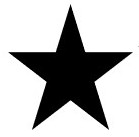

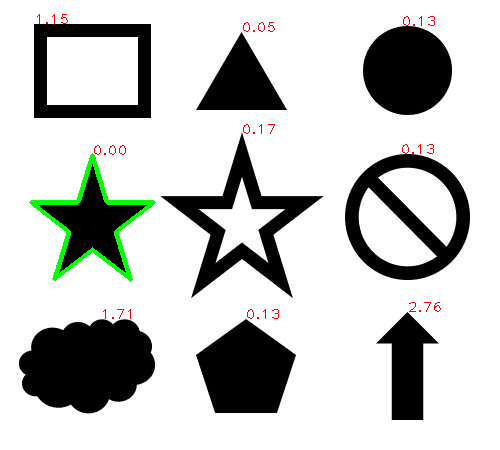

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/star_shape.jpg')
shapes = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')

targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapeGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)

ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapeTh = cv2.threshold(shapeGray, 127, 255, cv2.THRESH_BINARY_INV)

#컨투어 찾기
cntrs_target, hr = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs_shapes, hr = cv2.findContours(shapeTh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
  #대상 도형과 여러 도형 중 하나와 매칭 실행
  match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
  #해당 도형의 매칭 점수와 컨두어를 쌍으로 지정
  matchs.append((match, contr))
  #해당 도형의 컨투어 시작 지점에 매칭 점수 표시
  cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 1)

#매칭 점수로 정렬
matchs.sort(key=lambda x:x[0])
#가장 적은 매칭 점수를 얻은 도형의 컨투어에 선 그리기
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)
cv2_imshow(target)
cv2_imshow(shapes)



##03 허프변환
* 이미지에서 직선과 원 같이 간단한 모양을 식별하는 가장 유명한 방법
* 이미지의 형태를 찾거나, 누락되거나 깨진 영역을 복원할 때 사용
* **허프 선 변환 방법**
  * 이미지의 수많은 픽셀 중 서로 직선 관계를 갖는 픽셀들만 골라내는 직선 검출 알고리즘
  * 직선의 방정식 y=mx+c 는 삼각함수를 사용해 r=x cos 세타 + y sin 세타 로 표현
    * xy 좌표계상에 존재하는 점들을 극 좌표계상의 직선으로 변환
    * 각각의 점에 다양한 직선을 그었을 때 좌표 원점에서 직선까지 직교하는 수선의 각도와 길이를 측정
    * 아래 그림에서 60도의 직선까지의 수선의 길이가 제일 비슷<p>
    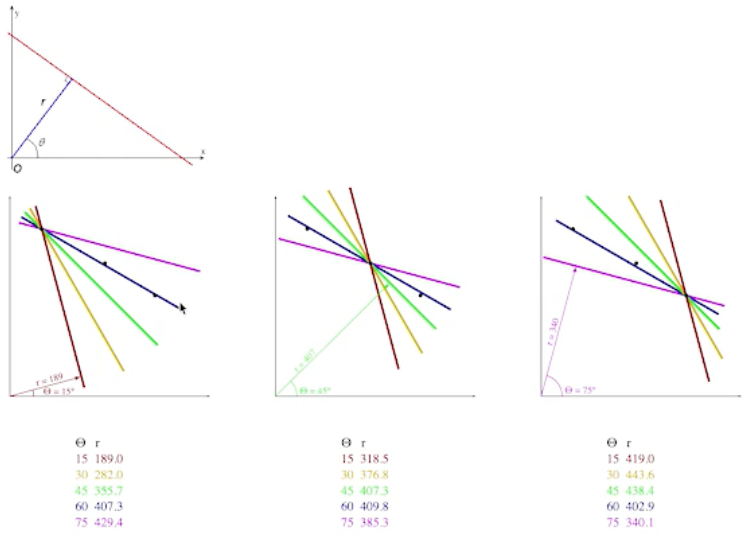
어떤 직선이 있을 때 원점과 직선의 수선에서 , 수선의 길이와 x 축과의 각도로 계산

사진과 같이 점이 3개가 있을 때.<p>
첫 번째 점을 지나는 다양한 선에서 각 선에서 원점에 대한 수선을 그어 각도와 선의 길이를 모두 구한다.<p>
두 번째 점을 지나는 다양한 선에서 ... 각도와 길이를 모두 구한다.<p>
세 번째 점을 지나는 ... 각도와 길이를 모두 구한다.<p>
위의 각도 중 가장 비슷한 각도를 갖는 점, 길이가 가장 적게 차이가 나는 점에 대한 선분으로 결정한다.<br>
다양한 점을 선으로 긋고, 모두 계산해야하기 때문에 연산량이 많고, 느리다.

###03.1 허프 선 변환
cv2.HoughLines(image, rho, theta, threshold)<p>
**parameters:**
* image : 8bit, single-channel binary image, canny edge를 선 적용.
* rho: r값의 범위(0~1 실수)
* theta: theta값의 범위(0~180 정수)
* threshold: 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 높아짐.

In [ ]:
# 구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


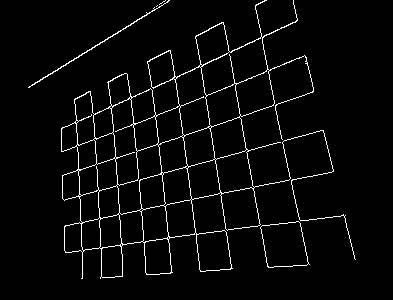

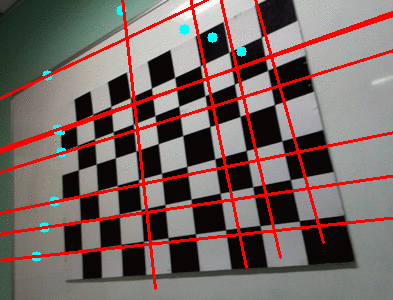

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/calibration.png')
img2 = img.copy()

height, width = img.shape[:2]

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 250, 400)
cv2_imshow(edges)

# 허프 선 검출, 직선으로 판단할 최소한의 점은 130개로 지정
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)

for line in lines: # 검출된 모든 선
  for  rho, theta in line: # 길이와 각도
    tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
    x0, y0 = tx * rho, ty * rho # x, y 기준(절편) 좌표

    # 기준 좌표에 점 그리기
    cv2.circle(img2, (abs(x0), abs(y0)), 5, (255,255,0), -1)

    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + width * (-ty)), int(y0 + height * tx)
    x2, y2 = int(x0 - width * (-ty)), int(y0 - height * tx)

    # 선 그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,0,255), 2)

cv2_imshow(img2)
# 카메라가 약간 휘어있어서, 검출된 선이 약간 어긋나 보인다.
# 보정을 먼저 해야할 것 같다.

### 03.2 확률 허프 선 변환
cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)<p>
허프 변환보다 빠르게 처리한다.<p>
**paramters:**
* image : 8bit, single-channel binary image, canny edge를 선 적용.
* rho: r값의 범위(0~1 실수)
* theta: theta값의 범위(0~180 정수)
* threshold: 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 높아짐.
* minLineLength: 선의 최소 길이. 이 값보다 작으면 reject
* maxLineLength: 선과 선 사이의 최대 허용 간격. 이 값보다 작으면 reject

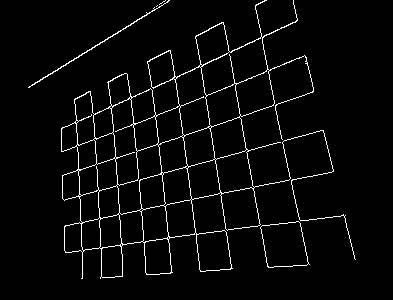

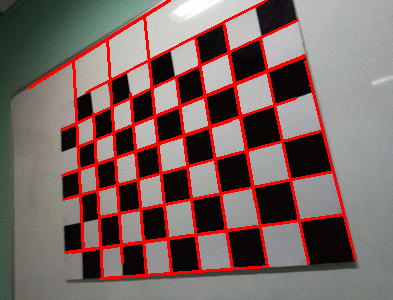

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/calibration.png')
img2 = img.copy()

# 그레이 스케일로 변환, 캐니 엣지 검출
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 250, 400)
cv2_imshow(edges)

rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 20
max_line_length = 50

# 확률 허프 변환 적용
lines = cv2.HoughLinesP(edges, rho, theta, threshold, None, min_line_length, max_line_length)

for line in lines:
  #검출된 선 그리기
  for x1, y1, x2, y2 in line:
    cv2.line(img2, (x1,y1), (x2, y2), (0,0,255),2)

cv2_imshow(img2)

### 03.3 허프 원 변환
cv2.HoughCircles(image, method, dp, minDist)<p>
**parameters:**
* image : 8bit, single-channel binary image, canny edge를 선 적용.
* method: 검풀 방법. HOUGH_GRADIENT 사용
* dp: dp=1이면 input image와 동일한 해상도
* minDist: 검출한 원의 중심과의 최소거리. 값이 작으면 원이 아닌 것들도 검출되고, 너무 크면 원을 놓칠 수 있음
* minRadius: 원의 최소 반지름
* maxRadius: 원의 최대 반지를

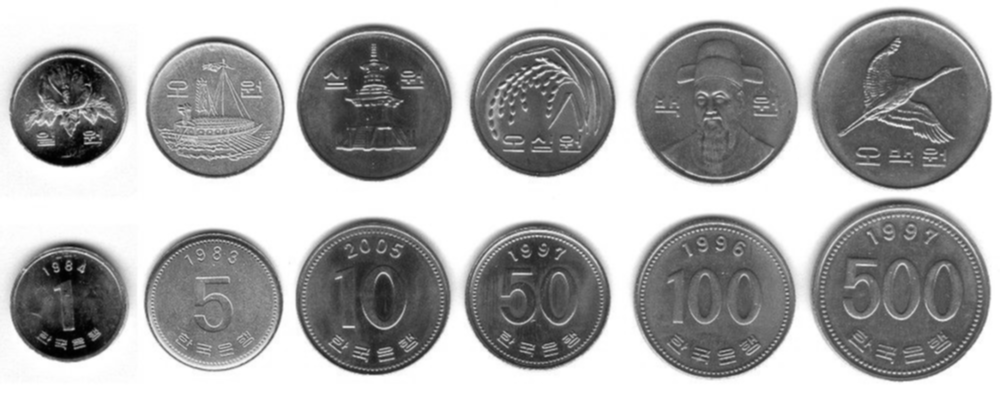

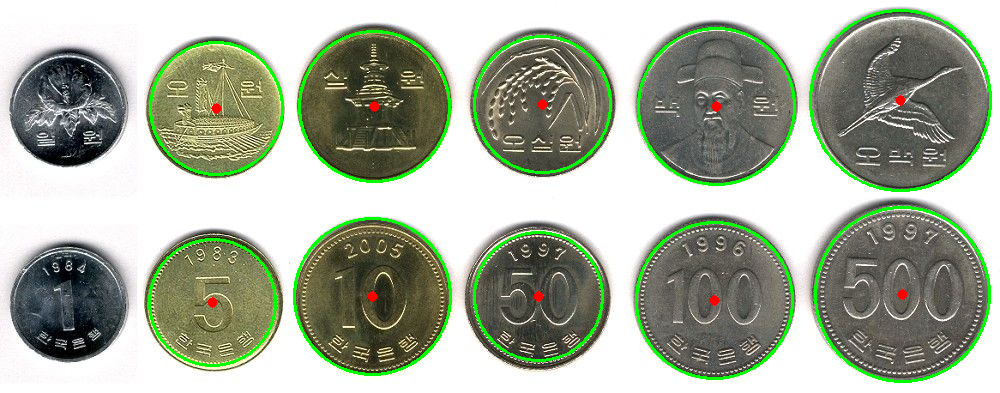

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#노이즈 제거를 위한 가우시안 블러
blurimg = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(blurimg)

dp=1
minDist = 20

# 최소 반지름을 크게 주니, 이미지에서 표시가 안되는 원들이 생긴다.
circles = cv2.HoughCircles(blurimg, cv2.HOUGH_GRADIENT, dp, minDist, minRadius=50, maxRadius=100)
if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0, :]:
    #원 둘레에 초록색 원 그리기
    cv2.circle(img, (i[0], i[1]), i[2], (0,255,0), 2)
    #원 중심점에 빨간색 원 그리기
    cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 6)

# 결과 출력
cv2_imshow(img)

##04 연속 영역 분할
실생활에서 찍은 사진은 컨투어가 분명하지 않거나 잘리는 경우가 많기 때문에 연속된 영역을 찾아 분할하는 방법도 필요함.
## 04.1 거리변환(Distance Transformation)
distanceTransform(src, dst, distanceType, maskSize)<p>
**parameters:**
* src:입력 영상, 바이너리 스케일
* distanceType: 거리 계산 방식
  * cv2.DIST_L2, cv2.DIST_L1, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER
* maskSize : 거리 변환 커널 크기

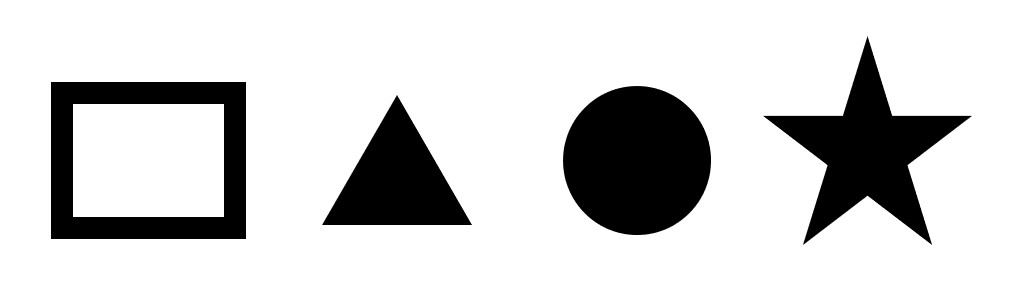

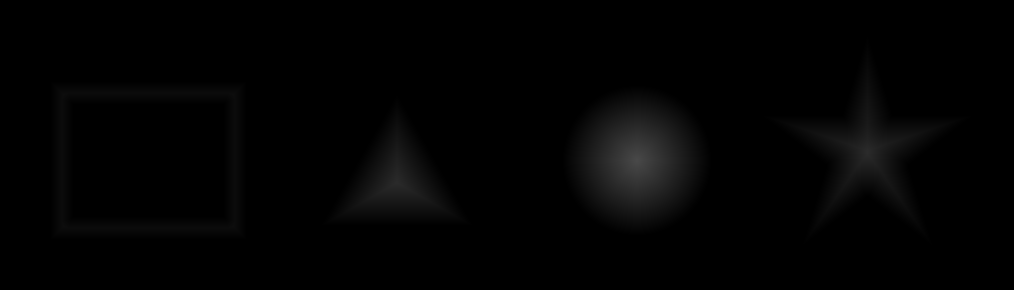

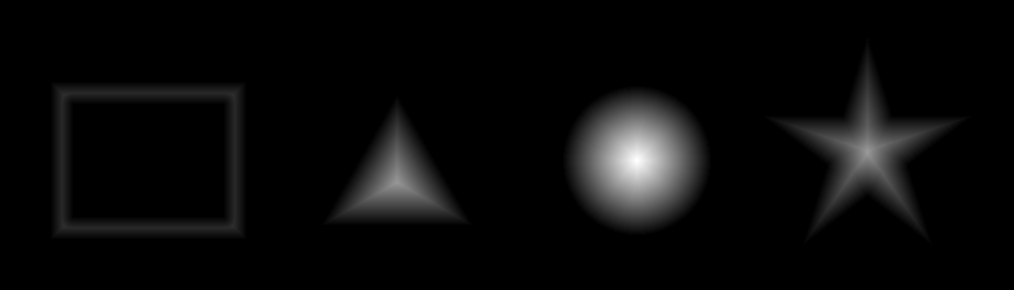

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# 예제 이미지는 흑백이 명확해서 할 필요는 없지만, 실제 사진을 normalize하면 좋다.
#dist_transform 함수를 사용하면 실수 타입(float32)의 이미지가 생성
#normalize 함수를 사용
result = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)

cv2_imshow(img)
cv2_imshow(dist_transform)  #형태의 가운데를 하얗게 한다.
cv2_imshow(result)  # 이미지의 하얀 부분을 더 하얗게 했다.

# 일반적인 카메라 영상을 이용하여 사람의 뼈대를 그리고, 움직임을 트래킹할 수 있다.
# tracking play in sports

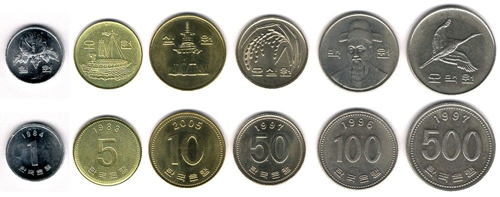

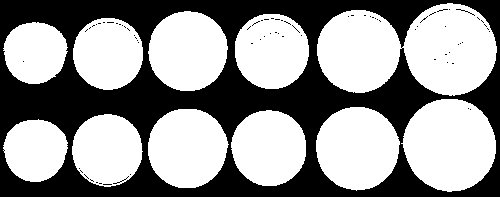

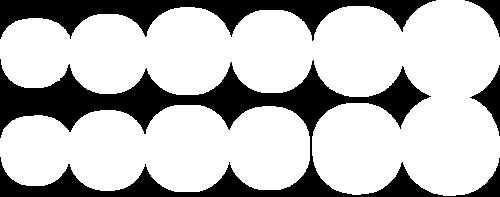

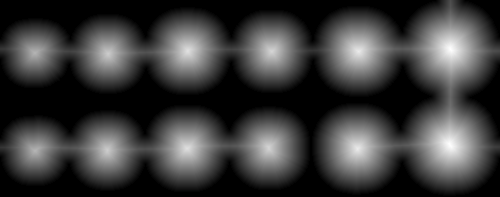

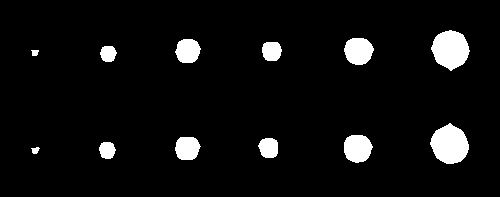

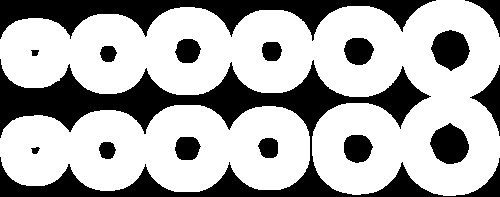

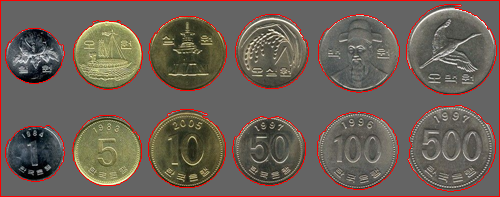

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/coins_small.png')
cv2_imshow(img)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

#모폴로지를 사용해 노이즈나 구멍제거
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
sure_bg = cv2.dilate(thresh, kernel)
cv2_imshow(sure_bg)

#동전 중앙 부분을 검출하기 위해서 distance transform을 적용
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
result_dist_transform = cv2.normalize(dist_transform, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
cv2_imshow(result_dist_transform)

#이진화 스레시 홀딩 적용
ret, sure_fg = cv2.threshold(dist_transform, 0.65*dist_transform.max(), 255, cv2.THRESH_BINARY)
cv2_imshow(sure_fg)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg) # 원래 이미지에서 확실한 부분을 빼준 이미지
# 동전이 붙어있는 경우에도 검출이 되도록 위와 같이 한다.
cv2_imshow(unknown)  

#마커 라벨링
ret, markers = cv2.connectedComponents(sure_fg)

# 확실한 배경이 1이 되도록 모든 라벨에 1을 더함
markers = markers + 1

# 확실하지 않은 구간을 0으로 처리
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)

img[markers== -1] = [0,0,255]
img[markers== 1] = [100,100,100]

cv2_imshow(img)